In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

# Plot settings
plt.rc(('xtick', 'ytick'), direction='in')
plt.rc('xtick', top=True)
plt.rc('ytick', right=True)
plt.rc('font', family='STIXgeneral')
plt.rc('figure', dpi=140)
plt.rc('figure', figsize=(4, 4))

In [42]:
def rms(array, axis=None):
    """
    Return the root-mean-square of a given array.

    Parameters
    ----------
    axis : int or NoneType
        Axis along which to calculate rms (passed to numpy.mean()).

    """
    return np.sqrt(np.mean(array**2, axis=axis))


def quad_add(arr1, arr2):
    """
    Add input arrays in quadrature.

    """
    return np.sqrt(arr1**2 + arr2**2)


def scatter_hist(ax, x, y, xlim=None, ylim=None, log_norm=True, cmap='gray',
                 cmin=10, vmin=None, vmax=None):
    """
    Combination scatter plot + 2D histogram for denser regions.

    """
    if not xlim:
        xlim = (np.min(x), np.max(x))
    if not ylim:
        ylim = (np.min(y), np.max(y))
    xbins = np.linspace(xlim[0], xlim[1], num=50, endpoint=True)
    ybins = np.linspace(ylim[0], ylim[1], num=50, endpoint=True)
    if log_norm:
        norm = colors.LogNorm(vmin=vmin, vmax=vmax)
    else:
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
        
    ax.scatter(x, y, c='k', s=0.5)
    ax.hist2d(x, y, bins=[xbins, ybins], cmap=cmap, norm=norm, cmin=cmin)
        
    dx = xbins[1] - xbins[0]
    dy = ybins[1] - ybins[0]
    ax.set_xlim((xlim[0] - 2*dx, xlim[1] + 2*dx))
    ax.set_ylim((ylim[0] - 2*dy, ylim[1] + 2*dy))
    return ax

In [22]:
data_file = 'C:\\Users\\dubay.11\\OneDrive - The Ohio State University\\Documents\\Docs\\First Year Project\\Data\\dr17_cut_data.csv'
data = pd.read_csv(data_file)
data

,APOGEE_ID,TELESCOPE,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,...,APOKASC2_AGE,APOKASC2_AGE_PERR,APOKASC2_AGE_MERR,APOKASC2_AV,APOKASC2_AV_ERR,APOKASC2_NOTE,APOK2_MASS,APOK2_MASS_ERR,APOK2_RADIUS,APOK2_RADIUS_ERR
0,2M00000002+7417074,apo25m,120+12,none,0.000103,74.285408,119.401807,11.767414,8.597,0.039,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
1,2M00000032+5737103,apo25m,N7789,none,0.001335,57.619530,116.065371,-4.564768,10.905,0.023,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
2,2M00000035-7323394,lco25m,SMC12,none,0.001467,-73.394287,307.939441,-43.230305,15.008,0.045,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
3,2M00000068+5710233,apo25m,N7789,none,0.002850,57.173164,115.977154,-5.002392,10.664,0.023,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
4,2M00000133+5721163,apo25m,NGC7789_btx,none,0.005558,57.354549,116.014776,-4.824917,13.261,0.029,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408646,2M23595867-7339039,lco25m,SMC12,none,359.994493,-73.651093,307.846602,-42.982597,15.671,0.069,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
408647,2M23595886+5726058,apo25m,116-04,none,359.995265,57.434956,116.025359,-4.745011,11.466,0.024,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
408648,2M23595921+5609479,apo25m,NGC7789_MGA,none,359.996744,56.163330,115.771964,-5.991363,11.985,0.023,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
408649,2M23595949-7342592,lco25m,SMC12,none,359.997887,-73.716454,307.821174,-42.919934,15.924,0.094,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN


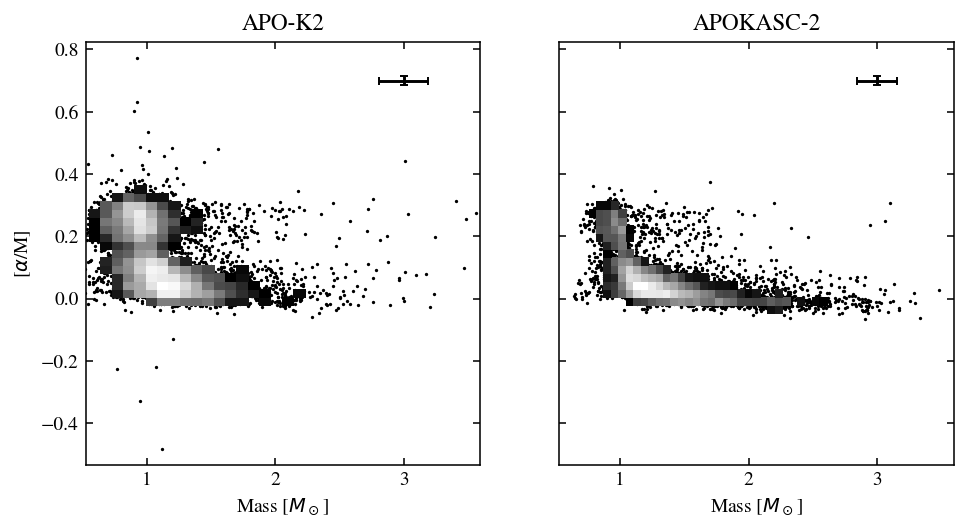

In [47]:
with_mass = data[(data['APOK2_MASS'] > 0) | (data['APOKASC2_MASS'] > 0)]

fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax = axs[0]
scatter_hist(ax, with_mass['APOK2_MASS'], with_mass['ALPHA_M'])
ax.errorbar(3, 0.7, 
            xerr=rms(with_mass['APOK2_MASS_ERR']),
            yerr=rms(with_mass['ALPHA_M_ERR']),
            color='k', capsize=2)
ax.set_title('APO-K2')
ax.set_xlabel(r'Mass [$M_\odot$]')
ax.set_ylabel(r'[$\alpha$/M]')

ax = axs[1]
scatter_hist(ax, with_mass['APOKASC2_MASS'], with_mass['ALPHA_M'])
ax.errorbar(3, 0.7, 
            xerr=rms(quad_add(with_mass['APOKASC2_MASS_RANERR'], 
                              with_mass['APOKASC2_MASS_SYSERR'])),
            yerr=rms(with_mass['ALPHA_M_ERR']),
            color='k', capsize=2)
ax.set_title('APOKASC-2')
ax.set_xlabel(r'Mass [$M_\odot$]')

plt.show()